# Lab 5: Text Classification

This lab explores a new dataset for text classification tasks using naïve Bayes and logistic regression.

### Learning Outcomes
* Be able to train and test naïve Bayes and logistic regression classifiers using scikit-learn.
* Know how to apply evaluation metrics to the classifiers and display examples of misclassifications.
* Be able to examine learned model parameters and explain how each classifier makes a decision.

### Outline

1. Load a new Twitter dataset, which is described in [this paper](https://arxiv.org/pdf/2010.12421.pdf), then extracts feature vectors from each sample.
1. Training and evaluating naïve Bayes using Scikit-learn.
1. Training and evaluating logistic regression using Scikit-learn.
1. Optional extension: lemmatization and bigram features.
1. Optional extensions: lexicon features.

### How To Complete This Lab

Read the text and the code then look for 'TODOs' that instruct you to complete some missing code. Look out for 'QUESTIONS' which you should try to answer before moving on to the next cell. Aim to work through the lab during the scheduled lab hours. To get help, you can talk to TAs or the lecturer during the labs, post questions to Blackboard (anonymously) or on Teams in the QA channel (with your name), or ask a question in the Wednesday live sessions. 

As you work through the notebooks, please make a note of any code that is unclear to you.

The labs *will not be marked*. However, they will prepare you for the coursework, so try to keep up with the weekly labs and have fun with the exercises! To understand what's going on inside the methods we use here, make sure to watch the lecture videos for the same week.

# 1. Preparing the Data 

This time we are using part of the Tweet Eval dataset, which contains seven Twitter datasets for various social media classification tasks. Here, we'll focus on the sentiment analysis data. 
Run the code below to download the data from [HuggingFace's datasets hub](https://huggingface.co/datasets/tweet_eval):

In [2]:
from datasets import load_dataset

cache_dir = "./data_cache"

# The data is already divided into training and test sets.
# Load the training set:
train_dataset = load_dataset(
    "tweet_eval",
    name="sentiment",
    split="train",
    #ignore_verifications=True,
    cache_dir=cache_dir,
)
print(f"Training dataset with {len(train_dataset)} instances loaded")

Reusing dataset tweet_eval (./data_cache\tweet_eval\sentiment\1.1.0\12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343)


Training dataset with 45615 instances loaded


In [3]:
# Load the test set:
test_dataset = load_dataset(
    "tweet_eval",
    name="sentiment",
    split="test",
    #ignore_verifications=True,
    cache_dir=cache_dir,
)
print(f"Test dataset with {len(test_dataset)} instances loaded")

Reusing dataset tweet_eval (./data_cache\tweet_eval\sentiment\1.1.0\12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343)


Test dataset with 12284 instances loaded


Let's take a look at one of the instances in the training set:

In [4]:
train_dataset[0]

{'text': '"QT @user In the original draft of the 7th book, Remus Lupin survived the Battle of Hogwarts. #HappyBirthdayRemusLupin"',
 'label': 2}

The next step is to tokenise the text of each tweet and convert it to a bag of words, ready for input to a classifier. 
To do this, we will use the scikit-learn library. 

In [5]:
# Put the data into lists ready for the next steps...
train_tweets = [sample['text'] for sample in train_dataset]
train_labels = [sample['label'] for sample in train_dataset]

In [6]:
test_tweets = [sample['text'] for sample in test_dataset]
test_labels = [sample['label'] for sample in test_dataset]

To extract a bag of words, we can use the CountVectorizer class ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)).
This class outputs the bag of words as a feature vector, where the length of the vector is equal to the size of the vocabulary, and the values are the counts of each words in a document. 

Run the code below to obtain feature vectors for the training and test samples:

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize

# CountVectorizer can do its own tokenization, but for consistency we want to
# carry on using WordNetTokenizer. We write a small wrapper class to enable this:
class Tokenizer(object):
    def __call__(self, tweets):
        return word_tokenize(tweets)

In [12]:
train_tweets

['"QT @user In the original draft of the 7th book, Remus Lupin survived the Battle of Hogwarts. #HappyBirthdayRemusLupin"',
 '"Ben Smith / Smith (concussion) remains out of the lineup Thursday, Curtis #NHL #SJ"',
 'Sorry bout the stream last night I crashed out but will be on tonight for sure. Then back to Minecraft in pc tomorrow night.',
 "Chase Headley's RBI double in the 8th inning off David Price snapped a Yankees streak of 33 consecutive scoreless innings against Blue Jays",
 '@user Alciato: Bee will invest 150 million in January, another 200 in the Summer and plans to bring Messi by 2017"',
 "@user LIT MY MUM 'Kerry the louboutins I wonder how many Willam owns!!! Look Kerry Warner Wednesday!'",
 '"\\"""" SOUL TRAIN\\"""" OCT 27 HALLOWEEN SPECIAL ft T.dot FINEST rocking the mic...CRAZY CACTUS NIGHT CLUB ..ADV ticket $10 wt out costume $15..."',
 'So disappointed in wwe summerslam! I want to see john cena wins his 16th title',
 '"This is the last Sunday w/o football .....,NFL is b

In [16]:

# vectorizer = CountVectorizer(tokenizer=Tokenizer())  # construct the vectorizer
a = Tokenizer()
vectorizer = CountVectorizer()
vectorizer.fit(train_tweets)  # Learn the vocabulary
X_train = vectorizer.transform(train_tweets)  # extract training set bags of words
X_test = vectorizer.transform(test_tweets)  # extract test set bags of words

The fit() method sets the vectorizer up by extracting a vocabulary from some text data. 

QUESTION: Why do we fit the CountVectorizer on the training set?

The vectorizer stores the vocabulary as a dictionary that maps a token to its index in the feature vector. The code below looks up the indexes of some example words:

In [17]:
import reprlib

vocabulary = vectorizer.vocabulary_
print(vocabulary['the'])
print(vocabulary['horse'])
print(vocabulary['smile'])

print(f'Vocabulary size = {len(vocabulary)}')

37894
18241
34972
Vocabulary size = 43358


# 2. Naive Bayes Classifier

The code above has obtained the feature vectors and lists of labels. The data is now ready for use
with scikit-learn's classifiers.

Scikit-learn contains several different variants of naïve Bayes for different kinds of data. For our bag of words data, we need to use the [MultinomialNB class](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB).


TODO 2.1: Look at the documentation for MultinomalNB and write code to train a NB classifier using `X_train` and `train_labels`.

In [18]:
# WRITE YOUR CODE HERE
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,train_labels)


MultinomialNB()

Now we have a trained model, we would like to evaluate its performance on some test data. 

TODO 2.2: Refer to the documentation again and predict the labels for the test set. Use `X_test` as the inputs to the classifier.

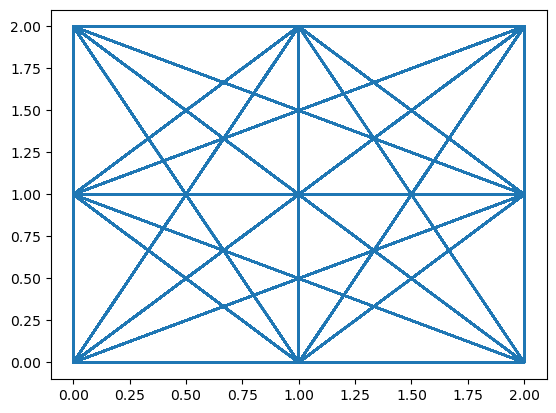

In [25]:
# WRITE YOUR CODE HERE
import matplotlib.pyplot as plt
data = clf.predict(X_test)
plt.plot(test_labels,data)

We can compute standard metrics for classifier performance using [scikit-learn's metrics libary](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules). A useful function for multi-class classification (when there are more than two classes) is the [classification report function](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report).

TODO 2.3: Refer again to the documentation, and compute accuracy, precision, recall and F1 scores on the test set. 

In [27]:
# WRITE YOUR CODE HERE
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(test_labels, data, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.59      0.55      0.57      3972
     class 1       0.62      0.58      0.60      5937
     class 2       0.50      0.63      0.56      2375

    accuracy                           0.58     12284
   macro avg       0.57      0.59      0.58     12284
weighted avg       0.59      0.58      0.58     12284



Now, let's examine the classifier that we learned. If you don't follow what's happening here, you may wish to refer back to the slides on naïve Bayes classifiers or to [Jurafsky and Martin's textbook](https://web.stanford.edu/~jurafsky/slp3/4.pdf). 

Previously, we trained a MultinomialNB classifier. The trained classifier object stores all the probabilities that it learned during training, which are needed to make predictions. The log of the likelihoods of each word given the class are represented by the attribute `feature_log_prob_`. So, if your classifier object is named `classifier`, you can access the likelihoods with `classifier.feature_log_prob_`.

TODO 2.4: Print out the likelihood of the words 'happy' and 'hate' in each class. Hint: look up the index of the chosen words in `vocabulary`. The rows of `feature_log_prob` correspond to classes, and the columns to words.

In [36]:
import numpy as np

### CHANGE THE NAME OF THE CLASSIFIER VARIABLE BELOW TO USE YOUR TRAINED CLASSIFIER
feat_likelihoods = np.exp(clf.feature_log_prob_)  # Use exponential to convert the logs back to probabilities
###
type(vocabulary)
# WRITE YOUR CODE HERE
if 'happy' in vocabulary:
   print(list(vocabulary).index('happy'))
if 'hate' in vocabulary:
   print(list(vocabulary).index('hate'))

print(feat_likelihoods[:,756])
print(feat_likelihoods[:,3675])

758
3675
[5.49426399e-06 4.72657921e-06 2.69029101e-06]
[1.09885280e-05 7.08986881e-06 2.69029101e-06]


The sentiment classes are negative (0), neutral (1) and positive (2). 

QUESTION: Which class has the strongest association with 'happy' and with 'hate'?

A key part of evaluating a classifier is investigating the errors it makes to better understand its limitations. 

TODO 2.5: Complete the code below to print out some misclassified tweets along with their predicted and true labels.

In [38]:
error_indexes = data != test_labels  # compare predictions to gold labels

# get the text of tweets where the classifier made an error:
tweets_err = np.array(test_tweets)[error_indexes]

### WRITE YOUR CODE HERE

####

for i in range(10):  # just print the first ten
    print(f'Tweet: {tweets_err[i]}; true label = {gold_err[i]}, prediction = {pred_err[i]}.')

NameError: name 'gold_err' is not defined

# 3. Logistic Regression Classifier

Another simple, linear classifier is logistic regression. This classifier does not rely on the conditional independence assumption, so can better model features that are highly correlated with each other. Scikit-learn provides the [logisticRegression class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), which has a very similar interface to the naïve Bayes classifier.

TODO 3.1: Train a logistic regression classifier, referring to the scikit-learn documentation as required.

In [ ]:
# WRITE YOUR CODE HERE


TODO 3.2: Obtain predictions on the test set.

In [ ]:
# WRITE YOUR CODE HERE


TODO 3.3: Compute accuracy, precision, recall and F1 scores on the test set using [scikit-learn's metrics libary.](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules)

In [ ]:
# WRITE YOUR CODE HERE


QUESTION: How does the performance of logistic regression compare with naïve Bayes?

The logistic regression classifier works by learning a weight for each feature that indicates its importance in predicting a class. These weights are stored in the `coef_` attribute of the LogisticRegression object, which has rows corresponding to classes, and columns corresponding to words in the vocabulary. 

TODO 3.4: Print out the weights for 'happy' and 'hate' for each class.

In [ ]:
### WRITE YOUR CODE HERE


QUESTION: Are the weights what you would expect to see?

The code below prints out the words with the highest weights for each class. We use numpy's `argsort` function to get the indexes of the sorted weights. Run the code below to show the result: 

In [ ]:
n_feats_to_show = 10

# Flip the index so that values are keys and keys are values:
keys = vectorizer.vocabulary_.values()
values = vectorizer.vocabulary_.keys()
vocab_inverted = dict(zip(keys, values))

for c, weights_c in enumerate(classifier.coef_):
    print(f'\nWeights for class {c}:\n')
    strongest_idxs = np.argsort(weights_c)[-n_feats_to_show:]

    for idx in strongest_idxs:
        print(f'{vocab_inverted[idx]} with weight {weights_c[idx]}')

TODO 3.5: Use the same code as for naïve Bayes to print out examples of misclassified tweets and their labels. Hint: you should be able to compy and paste your code from above :) 

In [ ]:
error_indexes = y_test_pred != test_labels  # compare predictions to gold labels

# get the text of tweets where the classifier made an error:
tweets_err = np.array(test_tweets)[error_indexes]

### WRITE YOUR CODE HERE

###

for i in range(10):  # just print the first ten
    print(f'Tweet: {tweets_err[i]}; true label = {gold_err[i]}, prediction = {pred_err[i]}.')

# 4. Optional: Lemmatization and N-grams

You only need to do this section if you finish the previous sections before the end of the lab.

In the previous lab, we tried out lemmatization. This is useful for reducing the size of the vocabulary. Could it help us here?

To apply lemmatization, we have to go back to the CountVectorizer and define a new tokenizer that will carry out the extra step of lemmatization. Run the code below to test this out:

In [ ]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

class LemmaTokenizer(object):
    
    def __init__(self):
        self.wnl = WordNetLemmatizer()
        
    def __call__(self, tweets):
        return [self.wnl.lemmatize(self.wnl.lemmatize(self.wnl.lemmatize(tok, pos='n'), pos='v'), pos='a') for tok in word_tokenize(tweets)]
    
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())

vectorizer.fit(train_tweets)
X_train = vectorizer.transform(train_tweets)
X_test = vectorizer.transform(test_tweets)

# Print out some of the features in the vocabulary:
print(list(vectorizer.vocabulary_)[:20])

In [ ]:
print(f'Vocabulary size: {len(vectorizer.vocabulary_)}')

TODO 4.1: Now, repeat your training of the logistic regression using the new features, and compare its performance with the previous classifers.

In [ ]:
### WRITE YOUR OWN CODE HERE


QUESTION: Did lemmatization bring about any improvements on this dataset?

The bag of words is a very simple representation of the tweets that does not capture enough information to make accurate sentiment classifications. Another way to improve it could be to use bigrams instead of single words as our features. Bigrams are pairs of words that occur one after another in the text. Bigrams are a kind of 'n-gram', where 'n=2'. 

To extract bigrams, we again modify our CountVectorizer. This class has a parameter `ngram_range`, which determines the range of sizes of n-grams the vectorizer will include. If we set `ngram_range=(1,1)` we have our standard bag of words. If we set it to `ngram_range=(2,2)`, we use bigrams instead. Choosing If we set `ngram_range=(1,2)` will use both single tokens (unigrams) and bigrams.

TODO 4.2: Create a new CountVectorizer that extracts bigram features instead of unigrams (single tokens) and uses the LemmaTokenizer.

In [ ]:
### WRITE YOUR CODE HERE
vectorizer = 
###

vectorizer.fit(train_tweets)
X_train = vectorizer.transform(train_tweets)
X_test = vectorizer.transform(test_tweets)


# Print out some of the features in the vocabulary:
print(list(vectorizer.vocabulary_)[:20])

TODO 4.3: Now, repeat your training of the logistic regression or naïve Bayes classifier using the new features, and compare its performance with the previous classifers.

In [ ]:
### WRITE YOUR OWN CODE HERE


QUESTION: Do bigrams improve performance on this dataset?

# 5. Optional: Lexicon Features

You only need to do this part if you finish the other parts before the end of the lab session. 

The NLTK library contains sentiment lexicons, which are lists of words with negative or positive connotations. 

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

analyser = SentimentIntensityAnalyzer()

Now have a look at the sentiment scores for some words in the lexicon by running the code below. What do the scores mean and why do some words have no score?

In [ ]:
testwords = ['happy', 'wonderful', 'horrible', 'boring', 'tablecloth', 'not']

for word in testwords:
    if word in analyser.lexicon:
        print(f'{word}: {analyser.lexicon[word]}')
    else:
        print(f'{word}: NOT IN LEXICON')

Now we would like to use this function to compute counts of all positive and negative words. Let's start by recording whether the words in our vocabulary are positive or negative:

In [ ]:
# get the Vader lexicon scores for each word in our vocabulary
vectorizer = CountVectorizer(tokenizer=Tokenizer())

vectorizer.fit(train_tweets)
X_train = vectorizer.transform(train_tweets)
X_test = vectorizer.transform(test_tweets)

# Print out some of the features in the vocabulary:
print(list(vectorizer.vocabulary_)[:20])

vocabulary = vectorizer.vocabulary_

lex_pos_scores = np.zeros((1, len(vocabulary)))
lex_neg_scores = np.zeros((1, len(vocabulary)))

for i, term in enumerate(vocabulary):
    if term in analyser.lexicon and analyser.lexicon[term] > 0:
        lex_pos_scores[0, i] = 1
    elif term in analyser.lexicon and analyser.lexicon[term] < 0:
        lex_neg_scores[0, i] = 1

Now let's compute the counts of positive and negative words in the dataset:

In [ ]:
# Compute the scores for each instance in the data set. 

# Multiply the lexicon scores by the feature vectors, then sum over the 
# vocabulary to get the total positive and total negative counts:
lex_pos_train = np.sum(X_train.multiply(lex_pos_scores), axis=1)
lex_pos_test = np.sum(X_test.multiply(lex_pos_scores), axis=1)

lex_neg_train = np.sum(X_train.multiply(lex_neg_scores), axis=1)
lex_neg_test = np.sum(X_test.multiply(lex_neg_scores), axis=1)

Finally, we can append the counts to the feature vector and treat them as extra features:

In [ ]:
from scipy.sparse import hstack

X_train = hstack((X_train, lex_pos_train, lex_neg_train))
X_test = hstack((X_test, lex_pos_test, lex_neg_test))

TODO 5.1: Use the new X_train and X_test feature vectors to train and evaluate your classifier. 
Does adding the lexicon features improve performance?

In [ ]:
### WRITE YOUR OWN CODE HERE
